In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
import pandas as pd

from scipy import integrate
from scipy import special


In [2]:
# Parameters

#s_tilda=np.linspace(0,10,100)
        #doesn't change much between the choice of 10 or 99


m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta

mzprime=0.5                                  #Mass of the dark photon in GeV
Mp = 1.22e19   
m=0.000501                                 # I choose the electron mass in Gev


s0= m1**2 + m2**2 + 2*m1*m2
sample=np.linspace(0,10,100)         # How can be its range?
s=sample+s0                      #the lowest value for s is s0 (assuming velocities zeros)

s_che_va_dentro_sigma=s-s0



epsilon=1E-4               # Has inside some factors as indicated in the computation papers
alpha_dark=1E-4               # what values?
alpha_em=1/137



pfin_pinit= (np.sqrt(((s-2*m**2)**2)-4*(m**4)/((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))   # ratio pfinal over p initial
p_fin=np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)        # p final
p_init=np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))      # p initial had to add the
               #abs was inside the sqrt to keep it positive           #absolute value because the first elemnt gives a sqrt of negative

E1= np.sqrt(m1**2 + p_init**2)
E2= np.sqrt(m2**2 + p_init**2)


In [3]:
s0= m1**2 + m2**2 + 2*m1*m2
s0

0.013225

[50.         48.0627583  46.20057471 44.41054111 42.68986207 41.03585045
 39.44592324 37.91759749 36.44848648 35.03629592 33.67882045 32.37394014
 31.11961721 29.91389281 28.754884   27.64078079 26.56984333 25.54039916
 24.55084063 23.59962239 22.68525894 21.80632235 20.96144001 20.1492925
 19.3686115  18.61817787 17.89681966 17.20341035 16.53686707 15.8961489
 15.28025525 14.6882243  14.11913149 13.57208808 13.04623978 12.54076539
 12.05487552 11.58781137 11.13884354 10.70727089 10.29241946  9.89364138
  9.51031389  9.14183835  8.78763934  8.44716372  8.11987976  7.80527637
  7.50286223  7.21216508  6.93273094  6.66412343  6.40592308  6.15772665
  5.91914655  5.6898102   5.46935945  5.25745003  5.053751    4.85794426
  4.66972401  4.48879633  4.31487866  4.1476994   3.98699748  3.83252192
  3.6840315   3.54129431  3.40408745  3.27219665  3.14541593  3.02354731
  2.90640047  2.79379247  2.68554745  2.58149636  2.48147671  2.3853323
  2.292913    2.20407447  2.11867797  2.03659014  1.95

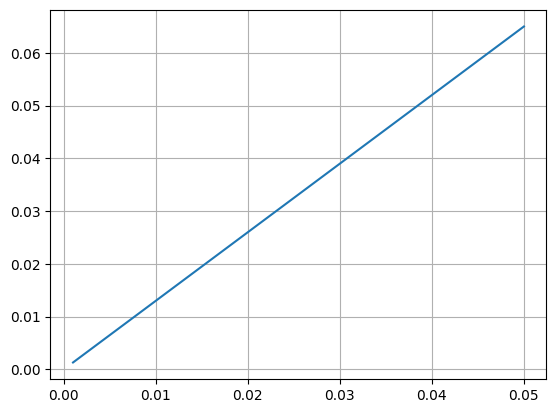

In [4]:
x1=np.logspace(np.log10(0.001),np.log10(0.05),100)       #***** CHANGING THIS INTERVAL CHANGE EVERITHING****

# I choose this in order to have a temperature range that goes from 50 MeV to 1 MeV
# Should be this correct?


# x=m/T         x1=np.logspace(np.log10(1),np.log10(100),100)


x2=x1*((m1+delta)/m1)
plt.plot(x1,x2)
plt.grid()

T=m2/x2
print(T)
Tsomething=m1/x1        #Just to prove that they are equal
print(Tsomething)

In [5]:
# I NEED TO FLIP 'T' TO HAVE IT IN THE RIGHT WAY
# THE TEMPERATURE NOW WILL BE THE ARRAY 'Ttrue'

# ACTUALLY... DO I NEED TO FLIP IT REALLY?!?!?

Ttrue=np.flip(T)     
Ttrue

#This is the temperature in GeV?

array([ 1.        ,  1.0403065 ,  1.08223762,  1.12585883,  1.17123827,
        1.21844678,  1.26755811,  1.31864895,  1.37179907,  1.4270915 ,
        1.48461256,  1.5444521 ,  1.60670357,  1.67146417,  1.73883504,
        1.8089214 ,  1.8818327 ,  1.95768279,  2.03659014,  2.11867797,
        2.20407447,  2.292913  ,  2.3853323 ,  2.48147671,  2.58149636,
        2.68554745,  2.79379247,  2.90640047,  3.02354731,  3.14541593,
        3.27219665,  3.40408745,  3.54129431,  3.6840315 ,  3.83252192,
        3.98699748,  4.1476994 ,  4.31487866,  4.48879633,  4.66972401,
        4.85794426,  5.053751  ,  5.25745003,  5.46935945,  5.6898102 ,
        5.91914655,  6.15772665,  6.40592308,  6.66412343,  6.93273094,
        7.21216508,  7.50286223,  7.80527637,  8.11987976,  8.44716372,
        8.78763934,  9.14183835,  9.51031389,  9.89364138, 10.29241946,
       10.70727089, 11.13884354, 11.58781137, 12.05487552, 12.54076539,
       13.04623978, 13.57208808, 14.11913149, 14.6882243 , 15.28

$$\sigma= \frac{16 \pi \epsilon^2 \alpha_D \alpha}{s(s-m_{Z'}^2)^2} \frac{|p_{final}|}{|p_{initial}|}\Big( \frac{sE_1E_2}{2}+ \frac{2}{3} p_{final}^2 p_{initial}^2 + \frac{m^2(s-m_1^2-m_2^2)}{2}+ \frac{m_1m_2(s-2m^2)}{2}+ 2m^2 m_1 m_2 \Big)$$

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{s_0}^{\infty} \sigma({s}-s_0)\sqrt{{s}}K_1(\sqrt{{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM


S0 E' 4M**2 OPPURE S0 NEL CASO DI iDM

In [6]:
# THIS IS THE WHOLE FORMULA FOR THE COANNIHILATION CROSS SECTION

#IT'S WITH THE CONSIDERATION OF DIFFERENT MASSES m1 AND m2 AS IN THA iDM CASE.
#THE FORMULA SHOULD BE CORRECT


#IF CONSIDERING m1=m1 AS GORDAN'S CASE WE END UP WITH THE SAME FORMULA A PART FROM:
      # AN OVERRALL FACTOR 2 MULTIPLYING THE ALL FORMULA (MAYBE BECAUSE I HAVEN'T AVERAGED OVER THE INITIAL STATES?)
      # A FACTOR 2 MULTUPLYING THE LAST MASS TERM 

        
# I NEED TO AVERAGE OVER THE INITIAL STATES BUT WHAT IS THE VALUE? DOES THE iDM HAVE SPINS?
# I NEED TO SUM OVER THE FINAL STATES BUT WHAT IS THE VALUE? HOW MANY FINAL STATES? ALL THE FERMIONS?


def sigma(s_che_va_dentro_sigma):
    return ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_che_va_dentro_sigma-mzprime**2)**2))*(pfin_pinit/s_che_va_dentro_sigma)*((s_che_va_dentro_sigma*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_che_va_dentro_sigma-(m1**2)-(m2**2))/2)+((m1*m2)*(s_che_va_dentro_sigma-2*(m**2))/2)+((m**2)*m1*m2*2))         



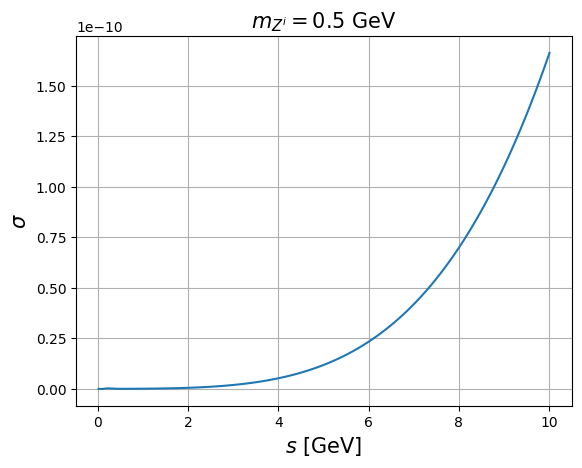

In [7]:
plt.plot(s,sigma(s))
plt.title('$m_{Z^i}=0.5$ GeV', size= 15)
plt.xlabel('$s$ [GeV]',size=15)
plt.ylabel(r'$\sigma$',size=15)
plt.grid()

#this one sometimes work sometimes not

$$s-s_0=-2m^2+2E_1E_2-2 \vec{p_1} \cdot \vec{p_2}$$

$$\tilde{s}- 4m^2=2m^2+2E_1E_2-2p_1 \cdot p_2- 4m^2 $$

$$\vec{p_1} \cdot \vec{p_2}=2p_1p_2 \cos \theta_{CM}$$

In [8]:
special.kn(1,np.sqrt(s[0])/T[0])

434.77491429567135

In [9]:
def pfin_pinit(s):
    return np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))

def p_fin(s):
    return np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)

def p_init(s):
    return np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))

def E1(s):
    return np.sqrt(m1**2 + p_init(s)**2)

def E2(s):
    return np.sqrt(m2**2 + p_init(s)**2)

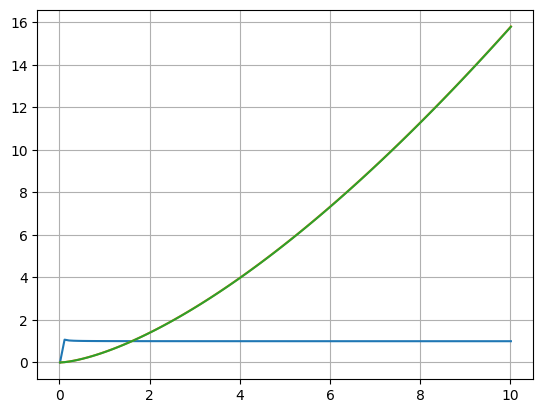

In [10]:
plt.plot(s,pfin_pinit(s-s0))

plt.plot(s,p_fin(s-s0))
plt.plot(s,p_init(s-s0))
#Their value is almost the same

plt.grid()

In [22]:
#def integr(s_tilda):
#    return np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue)


# container contains the integral value, so it's the numerator of the <sigma*v>

container=[]
for value in range(len(Ttrue)):
    container.append(integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*           np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/T[value]), s0,np.inf)[0])     

    
    #(s_tilda-s0)
    
#NOW IT INTEGRATES THE WHOLE THING, NUT HOW TO INTERPRETATE THE RESULT??
#IT'S TOO LOW??

   
    
    
    
    
    
    
#    ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*(pfin_pinit/s_tilda)*((s_tilda*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))     
    
    
    
    
    # pfin_pinit= (np.sqrt(((s-2*m**2)**2)-4*(m**4)/((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))
    #p_fin=  (np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s))        # p final
    #p_init= (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))
    #E1= (np.sqrt(m1**2 + (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))**2))
    #E2= (np.sqrt(m2**2 + (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))**2))
    #
    
    #((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*((np.sqrt(((s_tilda-2*m**2)**2)-4*(m**4)/((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))/s_tilda)*  ((s_tilda*(np.sqrt(m1**2 + (np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2))*(np.sqrt(m2**2 + (np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2))/2)+(2*((np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2)*((np.sqrt((((s_tilda-2*m**2)**2)-4*(m**4))/4*s_tilda))**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))*  
    
    


/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_2723/21301902.py:9: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  container.append(integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*           np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/T[value]), s0,np.inf)[0])
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_2723/21301902.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  container.append(integrate.quad(lambda s_tilda: ((

In [23]:
container

[1093561.2156180039,
 766881.6306251371,
 538071.9425901754,
 377601.1085792431,
 264966.08626962965,
 185880.32616507798,
 130354.17187461453,
 91382.3282260252,
 64042.50497708646,
 44872.53391197455,
 31436.92675520974,
 22023.331963856042,
 15428.929492643241,
 10809.688596819335,
 7573.898777551578,
 5307.028557343525,
 3718.789062965831,
 2589.0156000421975,
 1814.8130567022624,
 1273.0367351098712,
 893.3203292091882,
 626.8973871670412,
 439.85444140684785,
 308.52155840524847,
 216.32435439846245,
 151.62792532070767,
 106.25218859215936,
 74.44264051058029,
 52.151948201123645,
 36.53560751827149,
 25.59648014256887,
 17.93378663847778,
 12.5670390726333,
 8.80608442766859,
 6.170677716163026,
 4.323973621884025,
 3.029935416273699,
 2.1231656781132164,
 1.4877658685455353,
 1.042522665904503,
 0.7305276303027872,
 0.5119034212207798,
 0.35870686028274607,
 0.25135736813819115,
 0.17613427222944258,
 0.12342310139420676,
 0.08648671594193098,
 0.060604204298165563,
 0.0424674

In [24]:
print(len(container))
print(container[0])
print(container[1])
print(container[99])
print(4*m**2)

100
1093561.2156180039
766881.6306251371
5.790357207049429e-10
1.0040040000000002e-06


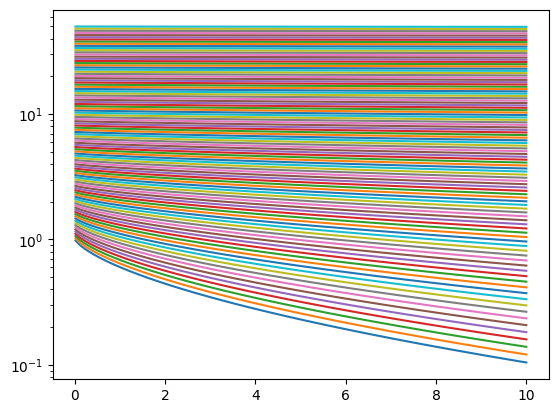

In [25]:
# THOSE AR THE SQRT OF S AND THE BESSEL FUNCTION

linspace=np.linspace(s0,10,100)
for N in range(100):
    plt.plot(linspace, np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))

plt.yscale('log')
#plt.xlim(0, 4*m**2)



# THOSE IN PRINCIPLE SHOULD BE THE PLOT OF THE VARIOUS FUNCTION THAT I HAVE TO INTEGRATE FROM 4*M**2 TO INFINITY

# MAKE SENSE?!?!?!?

# IN MY INTEGRATION s_tilda is a variable in which it integrates into, here is from 0 to 100 GeV, maybe too much?


/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_2723/3172557952.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(linspace, ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s-s0)-mzprime**2)**2))*(pfin_pinit(s-s0)/(s-s0))*(((s-s0)*E1(s-s0)*E2(s-s0)/2)+(2*(p_init(s-s0)**2)*(p_fin(s-s0)**2)/3)+((m**2)*((s-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*             np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))


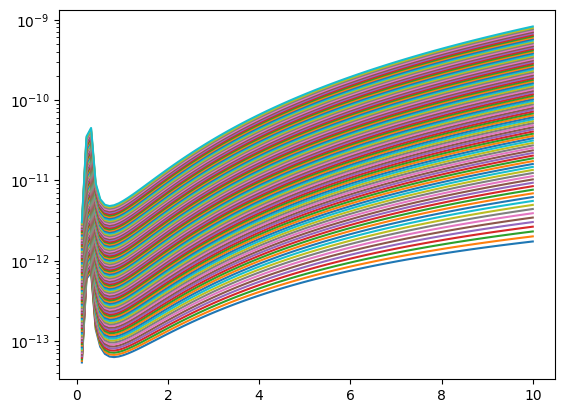

In [26]:
#THOSE ARE THE FUNCTION WE HAVE TO INTEGRATE FROM s0 TO INFINITY

linspace=np.linspace(s0,10,100)
for N in range(100):
    plt.plot(linspace, ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s-s0)-mzprime**2)**2))*(pfin_pinit(s-s0)/(s-s0))*(((s-s0)*E1(s-s0)*E2(s-s0)/2)+(2*(p_init(s-s0)**2)*(p_fin(s-s0)**2)/3)+((m**2)*((s-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*             np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))

plt.yscale('log')

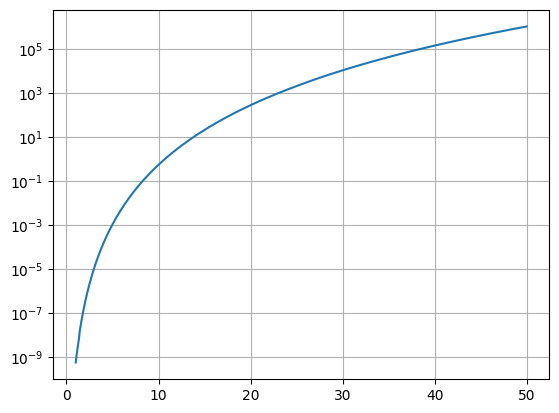

In [27]:

plt.plot(T,container)
plt.yscale('log')
plt.grid()

# How do I understand which values choose for s_tilda and T??
# They seems not in correlation in each other...
# They are like that just because I chose s_tilda to go from 1 to 100 and T same
# But in principle they can behave differently

# Quello che voglio dire è che s si accoppia con in valori di T a caso
# Il rpimo valore di s è 1, quello di T è 100 e si accoppiano così dando K1(1/100) e così via

# Esiste un legame fra s e la temperatura?!?!?!?!?!?!?!?

In [31]:
def DENOM(x1,x2):
    #T=m/x
    return 1/(8* m1**2 * m2**2  *Ttrue *(special.kn(2,x1)*(special.kn(2,x2))))

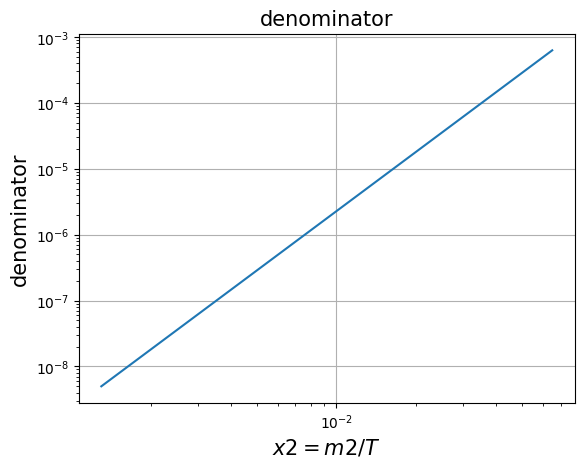

In [32]:
plt.plot(x2,DENOM(x1,x2))
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0.1,100)
plt.xlabel('$x2 = m2/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [33]:
Total= (container/DENOM(x1,x2))
Total

array([2.18712096e+14, 1.36230414e+14, 8.48989113e+13, 5.29189316e+13,
       3.29825423e+13, 2.05514889e+13, 1.28012042e+13, 7.97084070e+12,
       4.96165132e+12, 3.08783823e+12, 1.92145421e+12, 1.19560849e+12,
       7.43974006e+11, 4.62968187e+11, 2.88120033e+11, 1.79316962e+11,
       1.11605982e+11, 6.90139002e+10, 4.29684579e+10, 2.67716273e+10,
       1.66861831e+10, 1.04006909e+10, 6.48172567e+09, 4.03815611e+09,
       2.51488955e+09, 1.56570015e+09, 9.74502983e+08, 6.06433146e+08,
       3.77352782e+08, 2.34806002e+08, 1.46113025e+08, 9.09277584e+07,
       5.65943705e+07, 3.52240162e+07, 2.19232344e+07, 1.36449047e+07,
       8.49251886e+06, 5.28570207e+06, 3.28979624e+06, 2.04755460e+06,
       1.27438945e+06, 7.93175056e+05, 4.93669329e+05, 3.07258199e+05,
       1.91236625e+05, 1.19025206e+05, 7.40810468e+04, 4.61079281e+04,
       2.86975260e+04, 1.78613259e+04, 1.11168909e+04, 6.91916119e+03,
       4.30649594e+03, 2.68037258e+03, 1.66827203e+03, 1.03833908e+03,
      

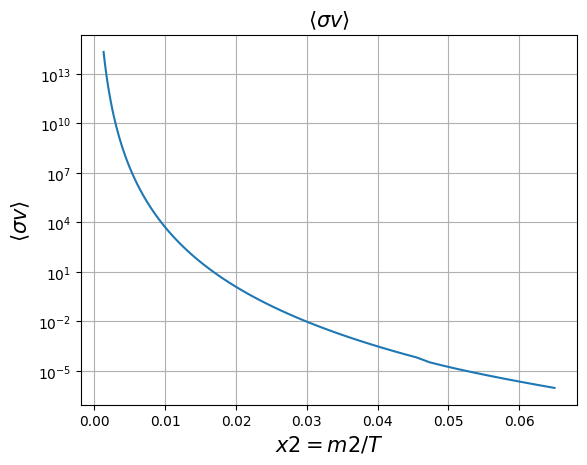

In [34]:
# plot of the total <sigma*v>

plt.plot(x2,Total)


plt.xlabel(r'$x2 = m2/T$', size= 15)
plt.ylabel( r'$\langle \sigma v \rangle$', size= 15)
plt.title( r'$\langle \sigma v \rangle$', size= 15)
plt.yscale('log')
plt.grid() 


